# The visualistion of dataset 


WE WILL SEE DIFFERENT TECHNIQUES OF VISUALISTION W.R.T TO 1-D,2-D,3-D AND SO ON.
WE WILL USE DIFFERENT TYPE OF GRAPHS.......


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
white_wine=pd.read_csv('winequality-white.csv',sep=";")
red_wine=pd.read_csv('winequality-red.csv',sep=";")


In [4]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
white_wine['wine_type']='white'
red_wine['wine_type']='red'

In [6]:
white_wine['quality_label']=white_wine['quality'].apply(lambda value:'low'
                                                       if value<=5 else 'medium' if value<=7 
                                                       else 'high')
white_wine['quality_label']=pd.Categorical(white_wine['quality_label'],categories=['low','medium','high'])

In [7]:
red_wine['quality_label']=red_wine['quality'].apply(lambda value:'low'
                                                       if value<=5 else 'medium' if value<=7 
                                                       else 'high')
red_wine['quality_label']=pd.Categorical(red_wine['quality_label'],categories=['low','medium','high'])

In [8]:
wines=pd.concat([red_wine,white_wine])

In [9]:
wines=wines.sample(frac=1,random_state=42).reset_index(drop=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


# Univariate analysisysing 
This analysis is basically the simplest form of data analysis of data visualistion where we are only concerned with analysing one data attributeor variable and visualising the same (one dimension)

# Visualistion in 1-D...

##HERE WE SEE HISTOGRAM OF EACH NUMERIC ATTRIBUTES...
FROM THIS WE OBSERVE THE DISTRIBUTION..


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc49b0ac18>,
      dtype=object)

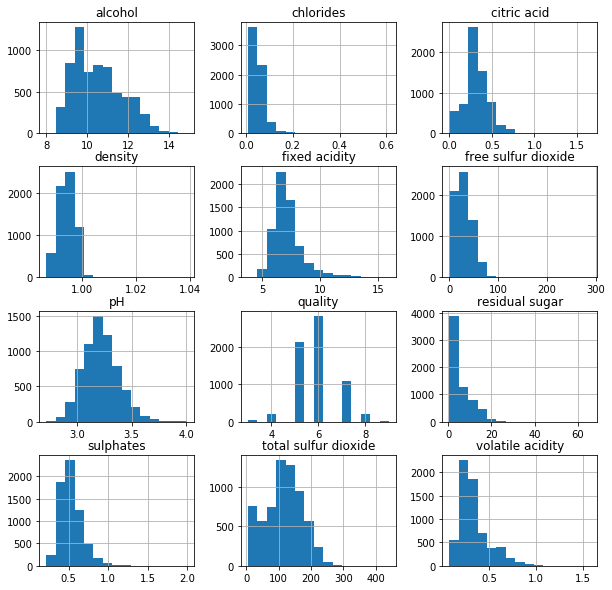

In [10]:
wines.hist(figsize=(10,10),bins=15)

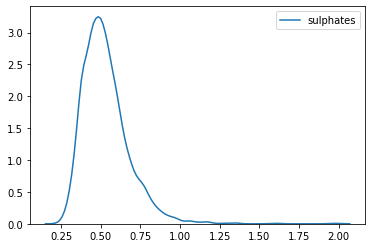

In [11]:
sns.kdeplot(wines['sulphates'])
##In diagram we can see that distribution of sulphates is right skewed...similarly we can see distribution  of all.



##we are visualising a discreate value help of bar plots..

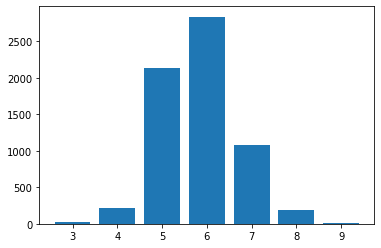

In [12]:
w_q=wines['quality'].value_counts()
w_q=(list(w_q.index),list(w_q.values))
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(1,1,1)
bar=ax.bar(w_q[0],w_q[1])



# Multivariate analysis
This analysis is where the fun as well as complexity begins. Here we can relation,pattern,corelation between different attributes.


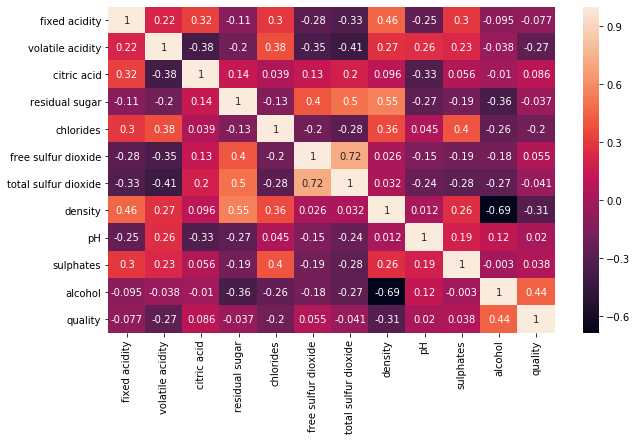

In [13]:
#the code for heatmap where each value inside show correlation between those attributes in row and column
corr=wines.corr()
f,ax=plt.subplots(figsize=(10,6))
hm=sns.heatmap(corr,annot=True,ax=ax)

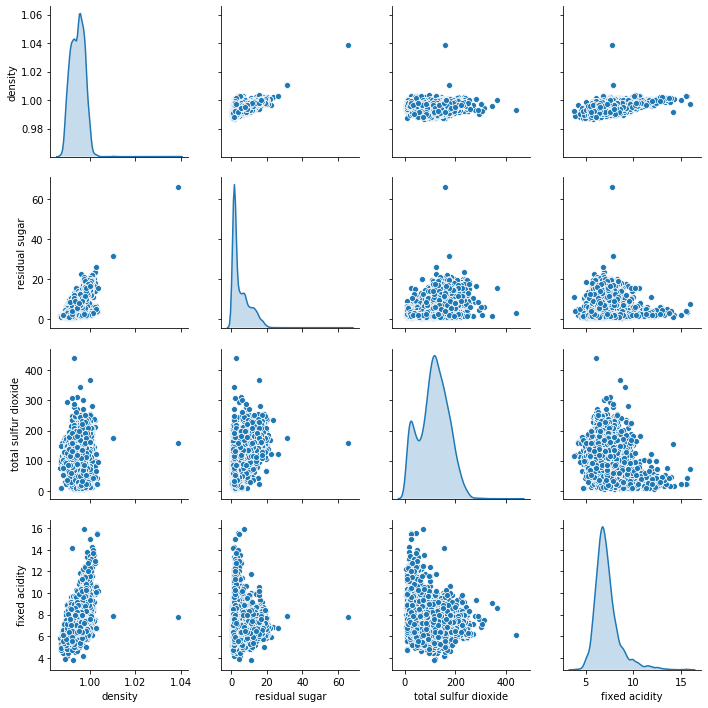

In [14]:
#Tihs is joint plot where wee can see pattern of each attributes...we can see dependency also..
cols=['density','residual sugar','total sulfur dioxide','fixed acidity']
pp=sns.pairplot(wines[cols],diag_kind='kde')

In [15]:
cols=['density','residual sugar','total sulfur dioxide','fixed acidity']
subset_df=wines[cols]
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_df=ss.fit_transform(subset_df)
scaled_df=pd.DataFrame(scaled_df,columns=cols)
final_df=pd.concat([scaled_df,wines['wine_type']],axis=1)

final_df.head()




,density,residual sugar,total sulfur dioxide,fixed acidity,wine_type
0,-0.165631,1.546371,0.181456,-0.166089,white
1,0.301278,-0.681719,0.305311,0.373895,red
2,-0.859324,0.411306,0.305311,-0.320370,white
3,0.408001,1.210056,1.189993,-0.706073,white
4,1.395180,1.777588,2.003900,0.142473,white


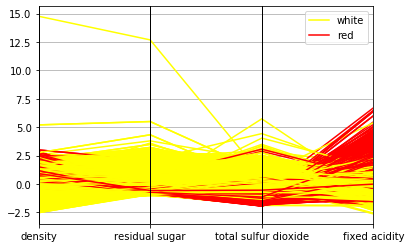

In [16]:
###this is another way of visualisation for multiple attributes together that is parallel coordinates
from pandas.plotting import parallel_coordinates
pc=parallel_coordinates(final_df,'wine_type',color=('yellow','red'))

Text(0, 0.5, 'alcohol')

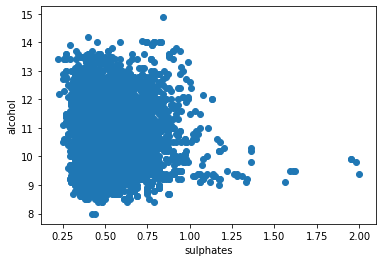

In [17]:
##wE CAN SEE RELATION BETWEEN SULPHATES AND ALCOHOL.....
plt.scatter(wines['sulphates'],wines['alcohol'])
plt.xlabel('sulphates')
plt.ylabel('alcohol')

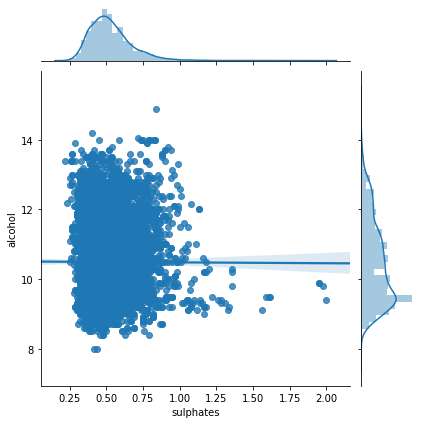

In [18]:
# IN JOINTPLOT WE CAN SEE RELATION AS WELL AS INDIVIDUAL DISTRIBUTION ALSO..
jp=sns.jointplot(x='sulphates',y='alcohol',data=wines,kind='reg')

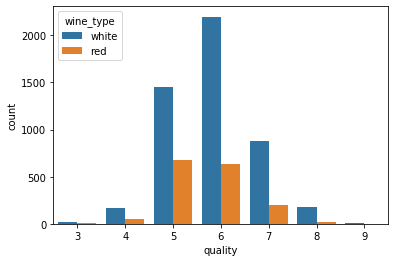

In [19]:
cp=sns.countplot(x="quality",hue='wine_type',data=wines)

Lets lool at visualising mixed attributes in 2-d(essentially numeric and categorical together ).
One way is to use faceting/subplotst along with generic histograms or density plotss...

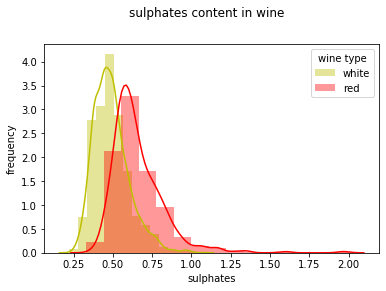

In [20]:
#using multiple histograms
fig=plt.figure(figsize=(6,4))
title=fig.suptitle("sulphates content in wine")
fig.subplots_adjust(top=0.85,wspace=0.3)
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("sulpahtes")
ax.set_ylabel("frequency")
g=sns.FacetGrid(wines,hue='wine_type',palette={"red":"r",'white':'y'})
g.map(sns.distplot,'sulphates',kde=True ,bins=15,ax=ax)
ax.legend(title="wine type")
plt.close(2)


##In graph we can see that sulphate content in red or white wine ...
##we can easily compare distribution of both

Now we will use boxplot for detecting outliers and quartile range

Text(0, 0.5, 'wine alcohol ')

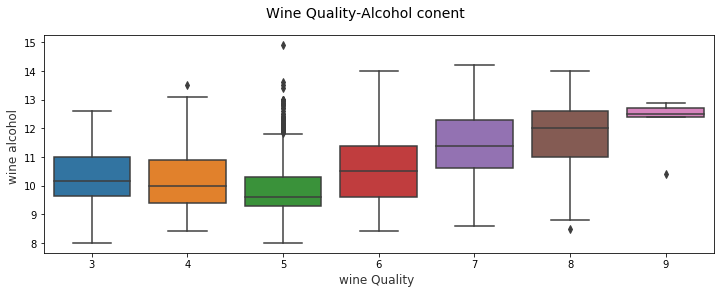

In [21]:
f,ax=plt.subplots(1,1,figsize=(12,4))
f.suptitle('Wine Quality-Alcohol conent ',fontsize=14)
sns.boxplot(x='quality',y='alcohol',data=wines,ax=ax)
ax.set_xlabel("wine Quality ",size=12,alpha=0.8)
ax.set_ylabel("wine alcohol ",size=12,alpha=0.8)



we can do the same thing with viloin plot.

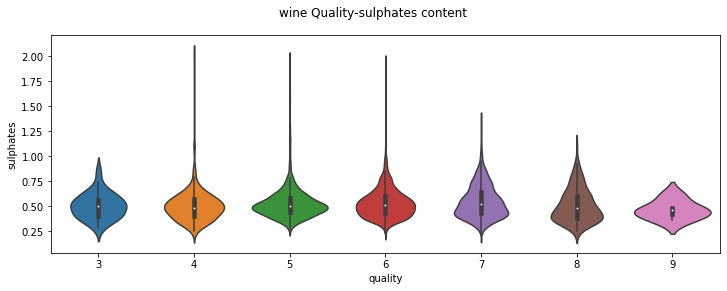

In [22]:
f,ax=plt.subplots(1,1,figsize=(12,4))
f.suptitle("wine Quality-sulphates content ")
sns.violinplot(x='quality',y='sulphates',data=wines,ax=ax)
ax.set_xlabel=('wine quality')
ax.set_ylabel=('wine sulphates')

we can clearly see the density plot above for the different wine quality categories for wine sulphate

# Visualiasing data in 3-D...

Considering three attributes or dimensions in the data ,we can visualise them by considering a pair-wise scatter plot and introducing the notion of color and hue to separate out values in categorical dimensions


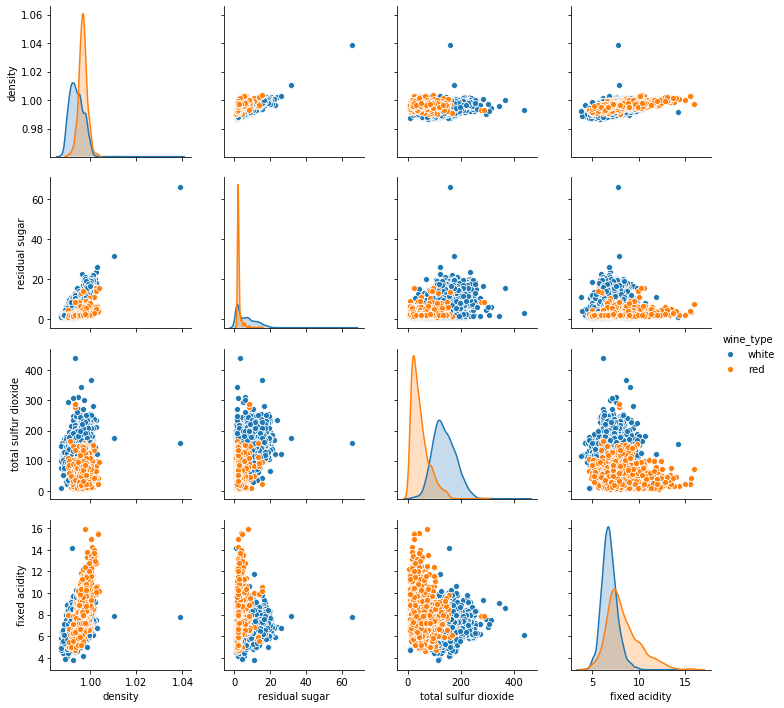

In [23]:
cols=['density','residual sugar','total sulfur dioxide','fixed acidity','wine_type']
pp=sns.pairplot(wines[cols],hue='wine_type')

The above plot enables you to check out the correlations and patterns and also compare around wine groups .Like we can clearly see total sulfur dioxide and residual sugar is higher for white wines as compared to red 

In [24]:
##Now we look at strategies for visualising three continuos ,numric attributes in x ,y and z axis.

Text(0.5, 0, 'alcohol')

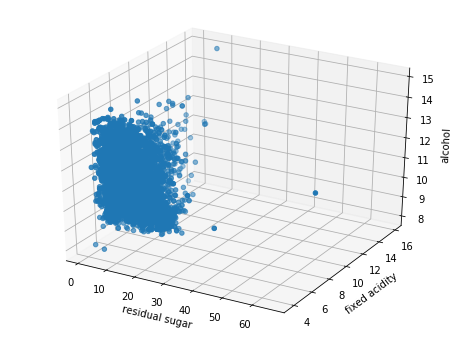

In [25]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection='3d')
xs=wines['residual sugar']
ys=wines['fixed acidity']
zs=wines['alcohol']
ax.scatter(xs,ys,zs)
ax.set_xlabel('residual sugar')
ax.set_ylabel('fixed acidity')
ax.set_zlabel('alcohol')

we can also use bubble chart in this chart size of bubble shows its quantity in third dimension.
but this chart is not so good or conventional but we can use if needed somewhere

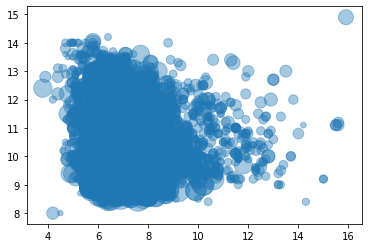

In [26]:
plt.scatter(wines['fixed acidity'],wines['alcohol'],s=wines['residual sugar']*30,alpha=0.4)

For visualizing three discreate categorical attributes we can simply use bar plots ,we can use hue to support additional third dimension... 

/home/raghib/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


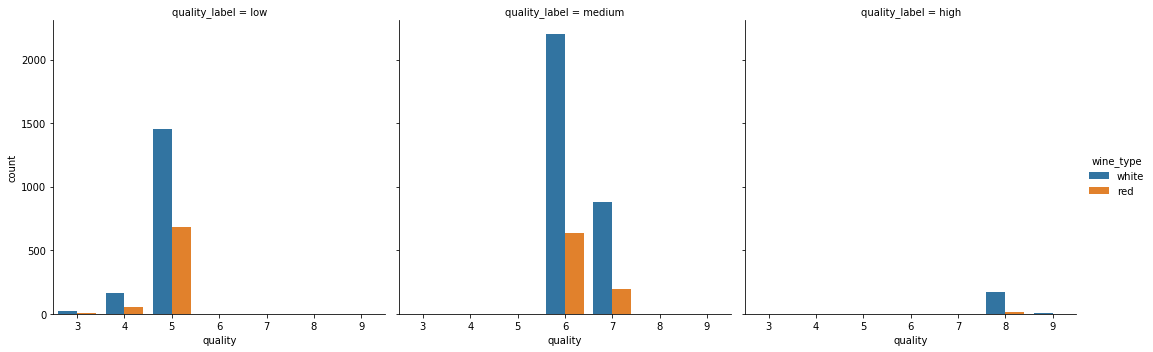

In [27]:
fc=sns.factorplot(x='quality',hue='wine_type',col='quality_label',data=wines,kind='count')

Visualising for three mixed attributes we can use yhe notion of hue for seperating our groups in one of the categorical attributes while using conventional visualistions like scatter-plots for visualising two dimensions for numeric atttributes

/home/raghib/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


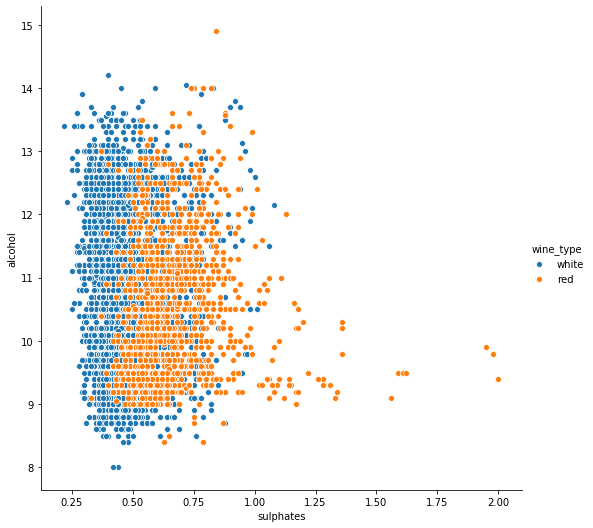

In [28]:
jp=sns.pairplot(wines,x_vars=['sulphates'],y_vars=['alcohol'],size=7.5,hue='wine_type')

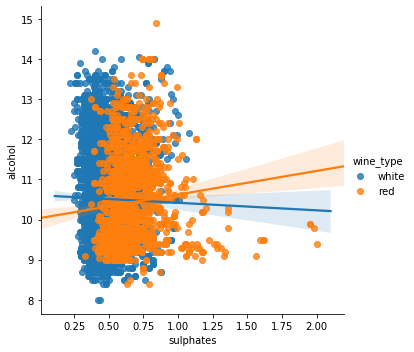

In [29]:
lp=sns.lmplot(x='sulphates',y='alcohol',hue='wine_type',data=wines)

we can also use kernel density to understand the data in three dimensions

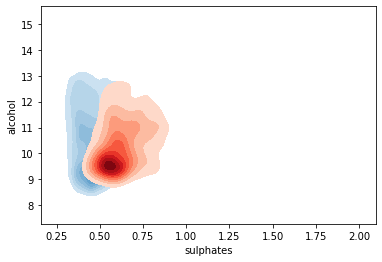

In [32]:
ax=sns.kdeplot(white_wine['sulphates'],white_wine['alcohol'],shade=True,shade_lowest=False)
ax=sns.kdeplot(red_wine['sulphates'],red_wine['alcohol'],shade=True,cmap='Reds',shade_lowest=False)


here we see red wine have higher sulphate level as compared to white wines.

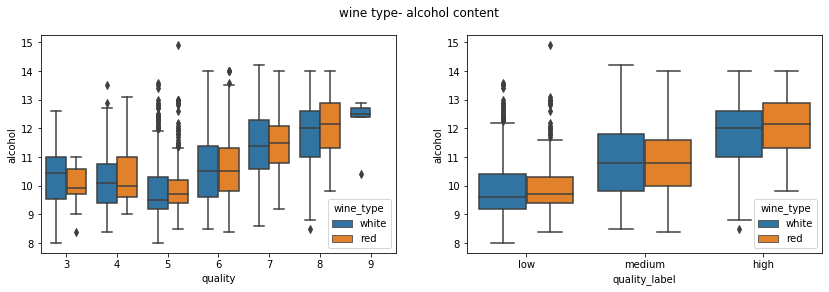

In [50]:
# now we will use boxplot foe 3d visualisation
f,(ax1,ax2)=plt.subplots(1,2,figsize=(14,4))
f.suptitle('wine type- alcohol content')
sns.boxplot(x='quality',y='alcohol',hue='wine_type',data=wines,ax=ax1)
sns.boxplot(x='quality_label',y='alcohol',hue='wine_type',data=wines,ax=ax2)

# Visualising in 4D

In [ ]:
fig=plt.figure(figsize=(8,6))
t=fig.suptitle("wine residual sugar -alcohol content -acidity type")
ax=fig.add_subplot(111,projection='3d')
xs=list(wines['residual sugar'])